<a href="https://colab.research.google.com/github/veto4ka24/6_sem/blob/main/%D0%B2%D1%8B%D1%87%D0%BC%D0%B0%D1%82%D1%8B_2%D0%B4%D0%B7_%D0%96%D0%B1%D0%B0%D0%BD%D0%BE%D0%B2%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import math as mt
import matplotlib.pyplot as plt
from matplotlib import mlab
from mpl_toolkits.mplot3d import Axes3D
import scipy as scp
from scipy import optimize
import numpy as np
import numpy.linalg as ln

**Вариант 17**
(Код частично взят из работы Карцевой Катерины Б06-804 и все равно не работает)

В задаче рассматриваем систему гиперболических уравнений 

$$\dfrac{\partial \textbf{u}}{\partial t} + \textbf{A}\dfrac{\partial \textbf{u}}{\partial x} = \textbf{b}(x), 0 \leqslant x \leqslant 1, 0 \leqslant t \leqslant 1, \textbf{u}(x, 0) = \left( \begin{matrix} sin \pi x \\ cos \pi x \\ 1 + sin \pi x \end{matrix} \right)$$
$$\textbf{A} = \left( \begin{matrix} \frac{10}{3} | -\frac{22}{3}| -20 \\ -\frac{5}{3} | \frac{11}{3} | 10 \\ -4 | 2 | 7  \end{matrix} \right), \textbf{b}(x) = \left( \begin{matrix} 0 \\ 0 \\ 0 \end{matrix} \right)$$


Сначала решим уравнение методом Лакса (которая для одномерного случая и сетки $x_m = m h, m = 0..M, Mh = 1; t^n = n \tau, n = 0..N, 1 = N \tau$ описывается выражением):

$$\dfrac{u_m ^{n + 1} - 0.5(u^n_{m + 1} + u^n_{m - 1})}{\tau} + a \dfrac{u^n_{m + 1} - u^n_{m - 1}}{2 h} = 0$$


In [9]:
ilist_t = mlab.frange(0, 5000, 1)
ilist_x = mlab.frange(0, 100, 1)
xlist, tlist = np.linspace(0, 1, 101), np.linspace(0, 1, 5001)

nt, nx = 5001, 101
h, tau = 0.01, 0.0002

r1_laks, r2_laks, r3_laks = np.zeros((nt, nx,)), np.zeros((nt, nx,)), np.zeros((nt, nx,))

lambda1 = -3
labmda2 = 0
labmda3 = 17

AttributeError: ignored

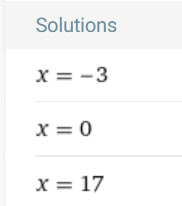

Разберемся с собственными числами матрицы $\textbf{A}$.

$$\Lambda = \left( \begin{matrix} -3 | 0 | 0 \\ 0 | 0 | 0 \\ 0 | 0 | 17 \end{matrix} \right)$$

Тогда характеристический вид уравнения ($\textbf{V}$ -- матрица из собственных векторов матрицы A):
$$\dot{w} + \textbf{Λ} \dfrac{\partial w}{\partial x} = 0, w = \textbf{V}^{-1} \textbf{u} $$
$$\textbf{V} = \left( \begin{matrix} 0 | c | 0 \\ 0 | -5c | 0 \\ 0| 2c | 0\\ \end{matrix} \right)$$
$$\textbf{V}^{-1} = \dfrac{1}{30} \left( \begin{matrix} 0 | 0 | 0 \\ \frac{1}{c} | \frac{-5}{c} | \frac{2}{c} \\ 0| 0 | 0\\ \end{matrix} \right)$$

Здесь c -- какая-то константа, возьмем ее равной 1.

Граничные условия теперь будут иметь вид

$$w(x, 0) = \frac{1}{30} \left( \begin{matrix} 0 \\ -2 cos \pi x \\ 0 \end{matrix} \right) = - \frac{1}{15} \left( \begin{matrix} 0 \\ cos \pi x \\ 0 \end{matrix} \right)$$

In [8]:
A = np.array([[10/3, -22/3, -20], [-5/3, 11/3, 10], [-4, 2, 7]])


[[-8.50016809e-01  2.78336890e-01  4.47213595e-01]
 [ 4.25008405e-01 -1.39168445e-01  8.94427191e-01]
 [ 3.11190103e-01  9.50347684e-01 -2.77555756e-17]]
[2.53498659e+01 2.73777422e+00 5.45175329e-16]
[[-0.18881745  0.3319229   0.92421597]
 [-0.964891   -0.23768436 -0.11176541]
 [-0.18257419  0.91287093 -0.36514837]]
